# About Dataset

The Kaggle Global Superstore dataset offers a comprehensive compilation of data detailing sales and orders within a worldwide superstore. It serves as a valuable asset for tasks involving data analysis and visualization. Initially formatted as a text file (txt), the dataset has been converted to CSV using the R programming language. The original dataset can be accessed here, while the modified CSV file used for this analysis is available here.

The dataset encompasses the following columns:

category: The product category sold in the superstore.

city: The city where the order was made.

country: The country hosting the superstore.

customer_id: A distinctive identifier for each customer.

customer_name: The name of the customer placing the order.

discount: The applied discount on the order.

market: The market or region where the superstore operates.

ji_lu_shu: An unspecified or unknown column.

order_date: The date when the order was initiated.

order_id: A unique identifier for each order.

order_priority: The priority level assigned to the order.

product_id: A unique identifier for each product.

product_name: The name of the product.

profit: The profit generated from the order.

quantity: The quantity of products ordered.

region: The region where the order was placed.

row_id: A unique identifier for each row in the dataset.

sales: The total sales amount for the order.

segment: The customer segment (e.g., consumer, corporate, or home office).

ship_date: The date when the order was shipped.

ship_mode: The shipping mode employed for the order.

shipping_cost: The cost of shipping for the order.

state: The state or region within the country.

sub_category: The sub-category of products within the main category.

year: The year in which the order was placed.

market2: Another column related to market information.

weeknum: The week number when the order was placed.

This dataset is versatile, suitable for a range of data analysis tasks, including uncovering sales trends, understanding customer behavior, and assessing profitability within the global superstore context.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-superstore/Global Superstore.txt


In [2]:
loc="best"# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-superstore/Global Superstore.txt


# Data Summary

In [3]:
# Load dataset into dataframe
df = pd.read_csv(str(file_path), sep="	")
df.head()

,Category,City,Country,Customer ID,Customer Name,Discount,Market,记录数,Order Date,Order ID,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [4]:
# Display the size of the dataset
print('Number of Rows = ',str(df.shape[0]), ', ', 'Number of Columns = ', str(df.shape[1]))

Number of Rows =  51290 ,  Number of Columns =  27


In [5]:
# Show all column names
df.columns

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name',
       'Discount', 'Market', '记录数', 'Order Date', 'Order ID', 'Order Priority',
       'Product ID', 'Product Name', 'Profit', 'Quantity', 'Region', 'Row ID',
       'Sales', 'Segment', 'Ship Date', 'Ship Mode', 'Shipping Cost', 'State',
       'Sub-Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [6]:
# Show unique values for each column
df.nunique()

Category              3
City               3636
Country             147
Customer ID        4873
Customer Name       795
Discount             27
Market                7
记录数                   1
Order Date         1430
Order ID          25035
Order Priority        4
Product ID        10292
Product Name       3788
Profit            24575
Quantity             14
Region               13
Row ID            51290
Sales              2246
Segment               3
Ship Date          1464
Ship Mode             4
Shipping Cost     16877
State              1094
Sub-Category         17
Year                  4
Market2               6
weeknum              53
dtype: int64

In [7]:
# Show information about a DataFrame including the index 
# dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer ID     51290 non-null  object 
 4   Customer Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order Date      51290 non-null  object 
 9   Order ID        51290 non-null  object 
 10  Order Priority  51290 non-null  object 
 11  Product ID      51290 non-null  object 
 12  Product Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [8]:
# Descriptive statistics
df.describe()

,Discount,记录数,Profit,Quantity,Row ID,Sales,Shipping Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


# Data Wrangling

In [9]:
# Look for null values and drop them if any
df.isnull().sum()

Category          0
City              0
Country           0
Customer ID       0
Customer Name     0
Discount          0
Market            0
记录数               0
Order Date        0
Order ID          0
Order Priority    0
Product ID        0
Product Name      0
Profit            0
Quantity          0
Region            0
Row ID            0
Sales             0
Segment           0
Ship Date         0
Ship Mode         0
Shipping Cost     0
State             0
Sub-Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [10]:
df.dropna()

,Category,City,Country,Customer ID,Customer Name,Discount,Market,记录数,Order Date,Order ID,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


In [11]:
# Drop columns
# 记录数 = Records, doesn't give much info
labels_to_drop = ['记录数']
df = df.drop(columns = labels_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer ID     51290 non-null  object 
 4   Customer Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   Order Date      51290 non-null  object 
 8   Order ID        51290 non-null  object 
 9   Order Priority  51290 non-null  object 
 10  Product ID      51290 non-null  object 
 11  Product Name    51290 non-null  object 
 12  Profit          51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Region          51290 non-null  object 
 15  Row ID          51290 non-null  int64  
 16  Sales           51290 non-null  int64  
 17  Segment         51290 non-null 

# Exploratry Data Analysis

## Find the time line of the data set

How many orders were plaed each year?

In [12]:
df['Year'].value_counts()

Year
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64

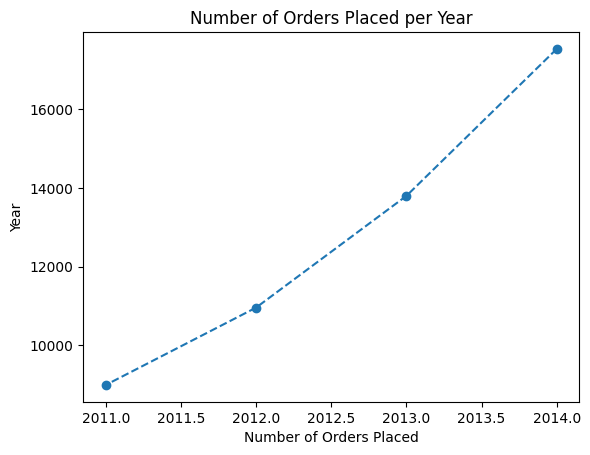

In [13]:
plt.plot(df['Year'].value_counts(), linestyle ='--', marker = 'o')
plt.ylabel('Year')
plt.xlabel('Number of Orders Placed')
plt.title('Number of Orders Placed per Year')
plt.show()

## How many different customers are there?

In [14]:
num_of_cust = len(df['Customer Name'].unique())
statement = 'The number of customers Walmart has around the world is'
print(statement,str(num_of_cust))

The number of customers Walmart has around the world is 795


## Which country orders the most from Walmart?

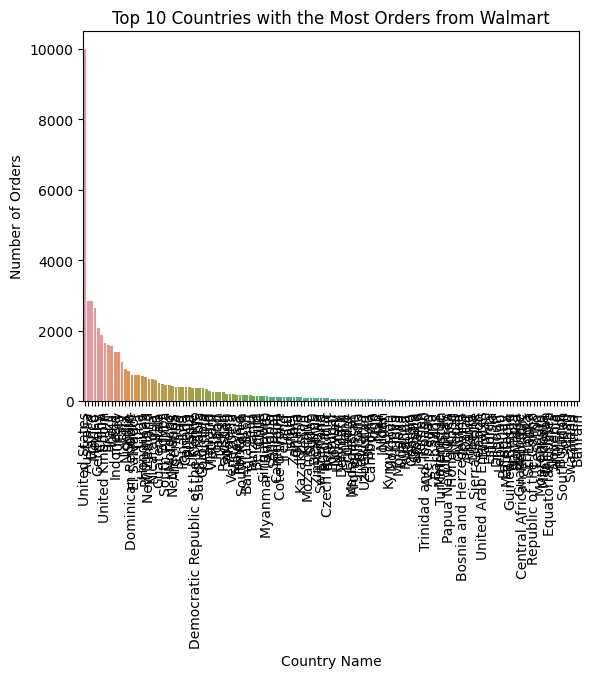

In [15]:
m = df['Country'].value_counts()
sns.barplot(data = df, y = m, 
        x = m.keys())
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.xlabel('Country Name')
plt.title('Top 10 Countries with the Most Orders from Walmart')
plt.show()

**Too many to see, lets get the top 10 countries that order from Walmart**

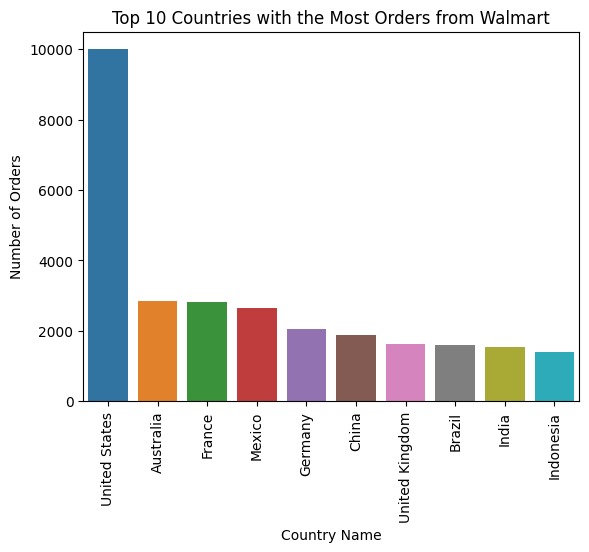

In [16]:
m = df['Country'].value_counts().head(10)
sns.barplot(data=df,x=m.keys(), y=m)
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.xlabel('Country Name')
plt.title('Top 10 Countries with the Most Orders from Walmart')
plt.show()

## Percentage of different sub-category of product sold

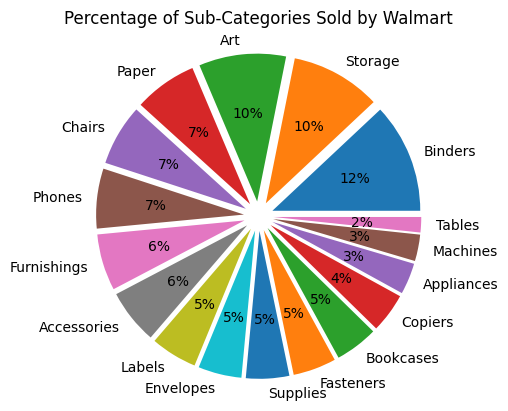

In [17]:
m = df['Sub-Category'].value_counts()
explode_len = len(m)
explode_size = [0.1]*explode_len

plt.pie(data=df, x = m, labels=m.keys(),autopct='%.0f%%', explode=explode_size)
plt.title('Percentage of Sub-Categories Sold by Walmart')
plt.show()

# Percentage of Profit per Sub Category

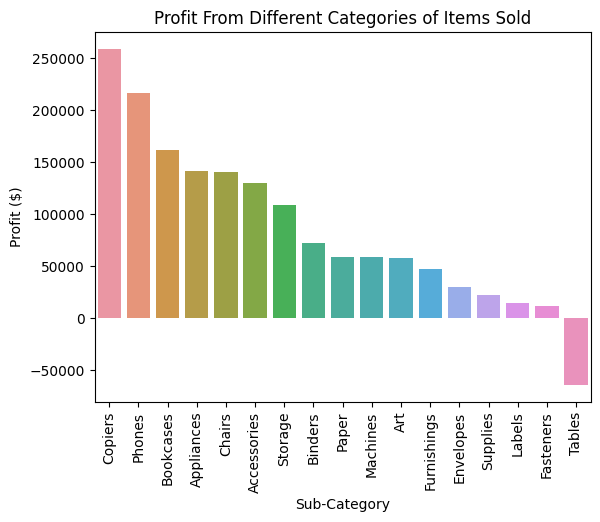

In [18]:
m = df.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False)
sns.barplot(data=df, x=m.keys(), y=m)
plt.xticks(rotation=90)
plt.ylabel('Profit ($)')
plt.xlabel('Sub-Category')
plt.title('Profit From Different Categories of Items Sold')
plt.show()

## Most common form of shipping

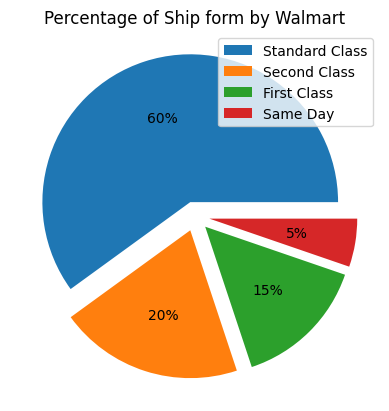

In [19]:
m = df['Ship Mode'].value_counts()
explode_len = len(m)
explode_size = [0.1] * explode_len

plt.pie(data=df, x = m, autopct='%.0f%%', explode=explode_size)
plt.title('Percentage of Ship form by Walmart')
plt.legend(labels=df['Ship Mode'].value_counts().keys(),loc="upper right")

plt.show()

# Customer Analysis

Find the customer who has made the most orders with Walmart and see what they have been buying, how much Walmart has profitted from them. Show also the modes of shipping they mostly use.

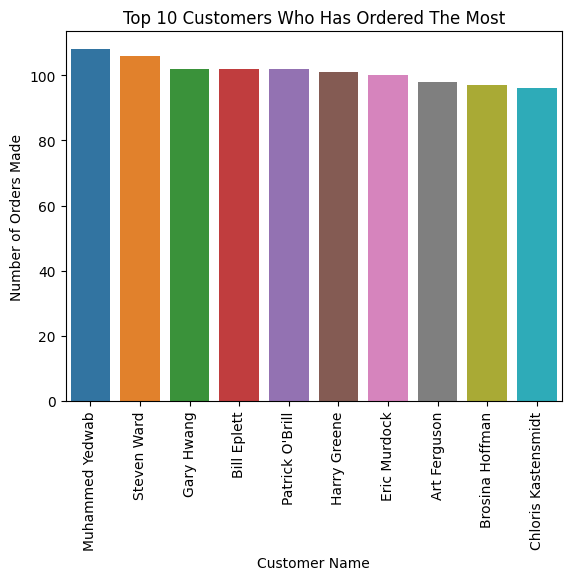

The customer who ordered the most with Walmart is Muhammed Yedwab


In [20]:
m = df['Customer Name'].value_counts().head(10)
sns.barplot(data = df, x = m.keys(), y = m)
plt.xticks(rotation=90)
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders Made')
plt.title('Top 10 Customers Who Has Ordered The Most')
plt.show()

largest_order_cust = df['Customer Name'].value_counts().keys()
statement = ('The customer who ordered the most with Walmart is ' + 
            largest_order_cust[0])
print(statement)

Muhammed Yedwab has placed the most orders. Lets look at their habits, i.e. what kind of stuff they order, where is it shipped to and how. How much they've spent, ect. 

In [21]:
df_MY = df[df['Customer Name'] == 'Muhammed Yedwab']

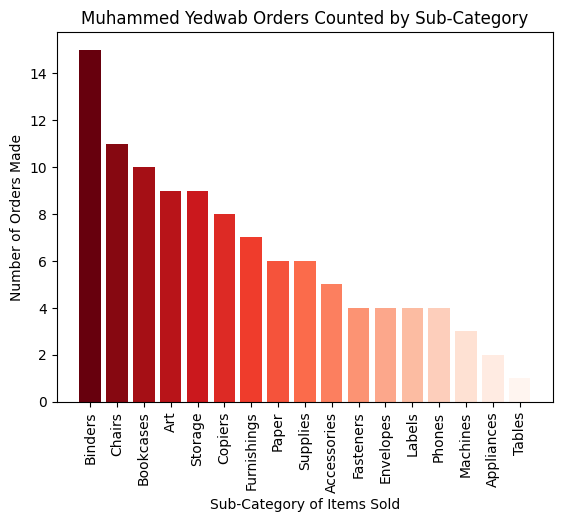

In [22]:
m = df_MY['Sub-Category'].value_counts()
colors = plt.cm.Reds_r(np.linspace(0, 1, 
            len(m.keys())))
plt.bar(data=df, height = m, x=m.keys(), color = colors)
plt.xticks(rotation=90)
plt.xlabel('Sub-Category of Items Sold')
plt.ylabel('Number of Orders Made')
plt.title('Muhammed Yedwab Orders Counted by Sub-Category')
plt.show()

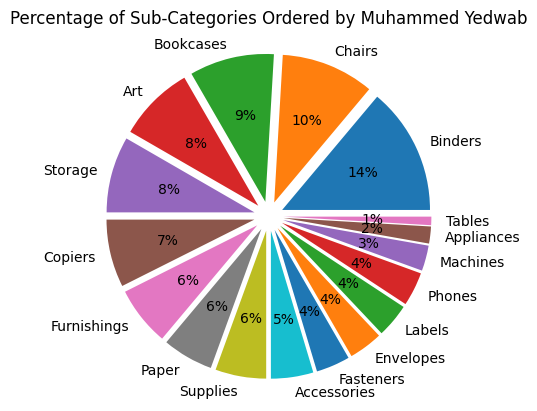

In [23]:
m = df_MY['Sub-Category'].value_counts()
explode_len = len(m)
explode_size = [0.1]*explode_len

plt.pie(data=df_MY, x = m, labels=m.keys(),autopct='%.0f%%', explode=explode_size)
plt.title('Percentage of Sub-Categories Ordered by Muhammed Yedwab')
plt.show()

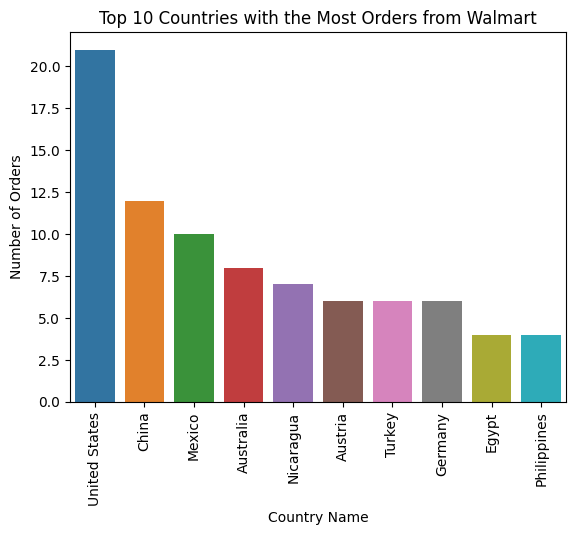

In [24]:
m = df_MY['Country'].value_counts().head(10)
sns.barplot(data=df,x=m.keys(), y=m)
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.xlabel('Country Name')
plt.title('Top 10 Countries with the Most Orders from Walmart')
plt.show()

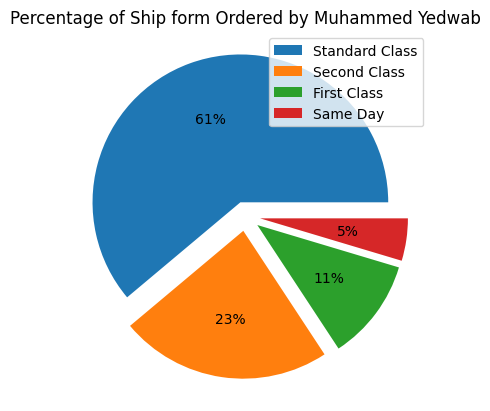

In [25]:
m = df_MY['Ship Mode'].value_counts()
explode_len = len(m)
explode_size = [0.1] * explode_len

plt.pie(data=df, x = m, autopct='%.0f%%', explode=explode_size)
plt.title('Percentage of Ship form Ordered by Muhammed Yedwab')
plt.legend(labels=df['Ship Mode'].value_counts().keys(),loc="upper right")

plt.show()

# Find the customer who has spent the most with walmart

Then find what kind of category they have been purchasing

In [26]:
round(df.groupby(['Customer Name'])['Profit'].sum().sort_values(ascending=False)[0],2)

8672.9

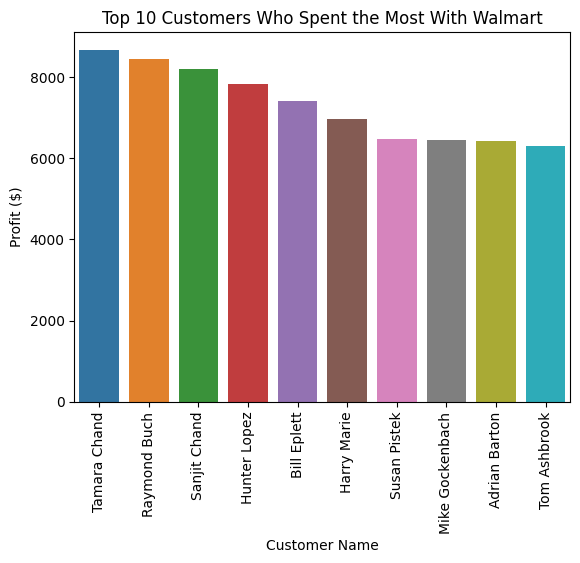

The customer who spent the most with Walmart is Tamara Chand ($8672.9).


In [27]:
m = df.groupby(['Customer Name'])['Profit'].sum().sort_values(ascending=False).head(10)
sns.barplot(data=df_MY, x=m.keys(), y=m)
plt.xticks(rotation=90)
plt.ylabel('Profit ($)')
plt.xlabel('Customer Name')
plt.title('Top 10 Customers Who Spent the Most With Walmart')
plt.show()
largest_expend_cust = df.groupby(['Customer Name'])['Profit'].sum().sort_values(ascending=False).keys()
statement = ('The customer who spent the most with Walmart is ' + 
            largest_expend_cust[0] + ' ($' +
             str(round(df.groupby(['Customer Name'])['Profit'].sum().sort_values(ascending=False)[0],2)) +
             ').')
print(statement)

Tamara Chand spent the most with walmart. Lets see their spending habits and what they by the most

In [28]:
# Make a new dataframe with entries having Tamara Chand's name only
df_TC = df[df['Customer Name'] == 'Tamara Chand']
df_TC.head(5)

,Category,City,Country,Customer ID,Customer Name,Discount,Market,Order Date,Order ID,Order Priority,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
933,Office Supplies,Long Beach,United States,TC-209804,Tamara Chand,0.0,US,2012-09-20 00:00:00.000,CA-2012-156013,Medium,...,61,Corporate,2012-09-26 00:00:00.000,Standard Class,2.74,New York,Paper,2012,North America,38
2355,Office Supplies,Decatur,United States,TC-209804,Tamara Chand,0.0,US,2011-12-27 00:00:00.000,CA-2011-153087,Medium,...,24,Corporate,2012-01-03 00:00:00.000,Standard Class,2.18,Alabama,Paper,2011,North America,53
2655,Office Supplies,Lafayette,United States,TC-209804,Tamara Chand,0.0,US,2013-10-03 00:00:00.000,CA-2013-118689,Medium,...,34,Corporate,2013-10-10 00:00:00.000,Standard Class,3.40,Indiana,Art,2013,North America,40
2656,Office Supplies,Lafayette,United States,TC-209804,Tamara Chand,0.0,US,2013-10-03 00:00:00.000,CA-2013-118689,Medium,...,34,Corporate,2013-10-10 00:00:00.000,Standard Class,1.55,Indiana,Binders,2013,North America,40
2657,Office Supplies,Lafayette,United States,TC-209804,Tamara Chand,0.0,US,2013-10-03 00:00:00.000,CA-2013-118689,Medium,...,736,Corporate,2013-10-10 00:00:00.000,Standard Class,57.57,Indiana,Binders,2013,North America,40


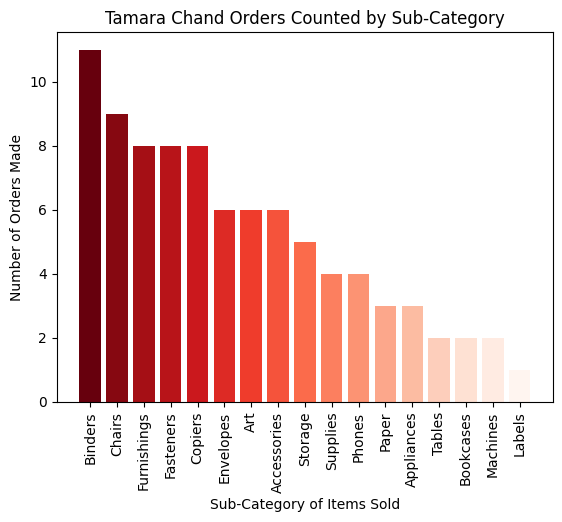

In [29]:
m = df_TC['Sub-Category'].value_counts()
colors = plt.cm.Reds_r(np.linspace(0, 1, 
            len(m.keys())))
plt.bar(data=df, height = m, x=m.keys(), color = colors)
plt.xticks(rotation=90)
plt.xlabel('Sub-Category of Items Sold')
plt.ylabel('Number of Orders Made')
plt.title('Tamara Chand Orders Counted by Sub-Category')
plt.show()

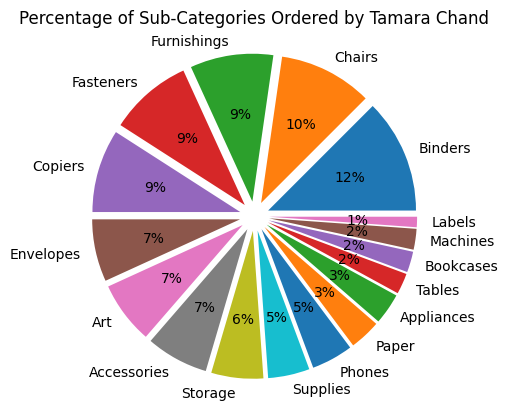

In [30]:
m = df_TC['Sub-Category'].value_counts()
explode_len = len(m)
explode_size = [0.1]*explode_len

plt.pie(data=df_MY, x = m, labels=m.keys(),autopct='%.0f%%', explode=explode_size)
plt.title('Percentage of Sub-Categories Ordered by Tamara Chand')
plt.show()

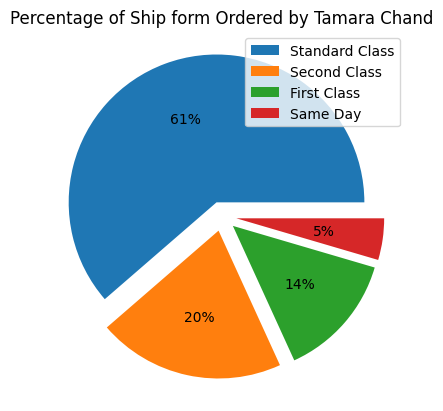

In [31]:
m = df_TC['Ship Mode'].value_counts()
explode_len = len(m)
explode_size = [0.1] * explode_len

plt.pie(data=df, x = m, autopct='%.0f%%', explode=explode_size)
plt.title('Percentage of Ship form Ordered by Tamara Chand')
plt.legend(labels=df['Ship Mode'].value_counts().keys(),loc="upper right")

plt.show()